# Bank Data Analysis

# Objective

In this case study, you will be working on Banking Data Analysis using Apache Spark, a powerful distributed computing framework designed for big data processing. This assignment aims to give you hands-on experience in analyzing large-scale banking datasets using PySpark and AWS services. You will apply techniques learned in data analytics to clean, transform, and explore banking data, drawing meaningful insights to support financial decision-making. Apart from understanding how big data tools can optimize performance on a single machine and across clusters, you will develop a structured approach to analyzing market capitalization trends, currency conversions, and global banking performance. Additionally, you will use AWS S3 to store the processed data once the ETL pipeline is complete, ensuring efficient data management and retrieval.


# Business Value

The banking industry operates in a highly competitive and globalized market where financial institutions must continuously monitor their market position, performance, and currency fluctuations. To stay competitive, banks must leverage data-driven insights to optimize their financial strategies, assess market trends, and make informed decisions. In this assignment, you will analyze banking data to uncover patterns in market capitalization, currency conversions, and global rankings. With Apache Spark's ability to handle large datasets efficiently, financial institutions can process vast amounts of data in real-time, helping them make faster and more informed decisions.


As an analyst at a financial institution, your task is to examine historical banking data to derive actionable insights that can drive strategic growth. Your analysis will help identify the top 10 largest banks by market capitalization, convert market cap values into multiple currencies (USD, GBP, EUR, INR), and store the processed data for easy retrieval. To enhance scalability and accessibility, you will utilize AWS S3 for data storage, ensuring seamless integration with cloud-based analytics tools. By leveraging big data analytics and cloud services, financial institutions can streamline operations, enhance decision-making, and maximize revenue opportunities.


# Dataset

The data for this project can be accessed from the following [wikipedia link](https://web.archive.org/web/20230908091635/https://en.wikipedia.org/wiki/List_of_largest_banks).

The dataset used in this analysis comprises global banking data extracted from a Wikipedia page (List of Largest Banks) archived as of September 2023.

It includes rankings of the world's largest banks based on market capitalization (in USD billions) and is structured into a single table with three columns. The data was scraped programmatically, cleaned, and transformed using PySpark to support cross-currency analysis. Exchange rate data (for USD, GBP, EUR, and INR) was sourced from a CSV file to enable currency conversions. The processed dataset is stored in CSV and SQLite formats for accessibility and efficient querying.

The dataset consists of a single table (Largest_banks) with the following three key attributes:
- **Rank:** Numerical position of the bank based on market capitalization.
- **Bank Name:** Name of the financial institution.
- **Market Cap (USD Billion):** Market valuation of the bank in USD billions.
This dataset enables analysis of global banking trends, cross-currency valuations, and the relative market dominance of financial institutions.

An additional data on market exchange rates is available to compare the marketcap dealing with different currencies.


<h2>Assignment Tasks</h2>

<ol>
    <li>
        <strong>Data Preparation</strong>
        <p>The dataset consists of a structured table containing global banking data. Before performing any analysis, it is crucial to prepare the data to ensure consistency and efficiency in processing.</p>
        Check for data consistency and ensure all columns are correctly formatted.<br>
        Structure and prepare the data for further processing and analysis.<br>
</br>
    <li>
        <strong>Data Cleaning</strong>
        <ul>
            2.1. <strong>Handling Missing Values:</strong> Decide on an approach to handle missing data (e.g., imputation or removal). Mention the approach in your report.<br>
            2.2. <strong>Fixing Columns:</strong> Ensure all columns are properly named and formatted.<br>
            2.3. <strong>Handling Outliers:</strong> Identify outliers in the dataset and explain why they are considered outliers. It is not necessary to remove them for this task, but mention your approach for handling them.<br>
        </ul>
</br>
    <li>
        <strong>Exploratory Data Analysis:</strong></br>
            EDA Finding Patterns - Analyze the dataset and find patterns based on the following points:
                <ul>
                    3.1. Convert PySpark DataFrame to Pandas DataFrame for visualization.<br>
                    3.2. Analyze the distribution of market capitalization using a histogram.<br>
                    3.3. Identify the top 10 banks by market capitalization using a bar chart.<br>
                    3.4. Visualize the relationship between market capitalization and bank ranking using a scatter plot.<br>
                    3.5. Use a boxplot to examine the spread and outliers in market capitalization.<br>
                    3.6. Display the quartile distribution of market capitalization using a violin plot.<br>
                    3.7. Compute cumulative market share and visualize it with a line plot.<br>
                    3.8. Categorize banks into market capitalization ranges and analyze their distribution using a bar chart.<br>
                    3.9. Calculate and display market share distribution of top 10 banks using a pie chart.<br>
                </ul>
        </ul>
</br>
    <li>
        <strong>Banking Data ETL Querying</strong>
        <ul>
            4.1. Perform Advanced Market Capitalization Analysis with Growth Metrics.<br>
            4.2. Analyze Market Concentration and Categorize Banks Based on Market Share Tiers.<br>
            4.3. Examine Statistical Distribution of Market Capitalization Using Quartile Analysis.<br>
            4.4. Conduct Comparative Size Analysis to Classify Banks by Relative Market Size.<br>
            4.5. Evaluate Market Growth and Identify Gaps Between Consecutive Banks.<br>
            4.6. Assess Market Dominance by Measuring Cumulative Share and Dominance Score.<br>
            4.7. Analyze Segment-Wise Bank Performance Based on Market Capitalization Ranges.<br>
            4.8. Generate a Comprehensive Performance Dashboard for Bank Rankings and Metrics.<br>
        </ul>
    </br>
    <li>
        <strong>Conclusion</strong></br>
            Provide final insights and recommendations based on the analysis:</br>
            <ul>
            5.1 Recommendations to track and compare market capitalisation of the top global banks toevaluate competitiveness and dominance.</br>
            5.2 Suggestions to use cross-currency analysis (USD, GBP, EUR, INR) for consistent benchmarking
of financial institutions across regions.</br>
            5.3 Propose continuous monitoring of market share concentration to identify growth opportunities
for mid-tier banks.</br>
            5.4  Identify potential regions or banking segments for expansion by analysing gaps between tiers
of banks and regional trends.</br>
            </ul>
    </br>
    <li>
        <strong>Visualization Integration [Optional]</strong>
        <p>Enhance the project by incorporating a visualization component that connects the processed data stored in an S3 bucket to a business intelligence tool such as Tableau or Power BI. This involves setting up the connection between the S3 bucket and the chosen visualization tool, importing the processed dataset for analysis and visualization, creating interactive dashboards to explore key trends and insights and ensuring data updates are reflected dynamically in the visualization tool.<br>
        </ul>
</ol>

Import Required Libraries

In [1]:
# # Install the required libraries
!pip install --quiet pyspark==3.5.4 pandas==2.2.2

  DEPRECATION: Building 'pyspark' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'pyspark'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [4]:
!pip install lxml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 29.9 MB/s  0:00:00 eta 0:00:01


In [93]:
# Import required libraries
import logging
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
# Import PySpark libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, round, count, when, isnull
import numpy as np

In [2]:
# Initialize Spark session
spark = SparkSession.builder \
    .appName("BankingDataAnalysis") \
    .getOrCreate()

25/11/04 11:45:41 WARN Utils: Your hostname, Payals-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.1.34 instead (on interface en0)
25/11/04 11:45:41 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/11/04 11:45:42 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


#**1. Data Preparation** <font color = red>[5 marks]</font> <br>


The data for this project can be accessed from the wikipedia link provided above. The page features data regarding global banking data.

Utilise the pandas method to read tables from the html document
and extract the requried data consists of a structured format.

Before performing any analysis, it is crucial to prepare the data to ensure consistency, and efficiency in processing.

In [40]:
# URL of the Wikipedia page
url = "https://web.archive.org/web/20230908091635/https://en.wikipedia.org/wiki/List_of_largest_banks"

# Use pandas to read all HTML tables from the page
tables = pd.read_html(url)

# Load the correct table (Table 1)
df_pandas = tables[1]
# print(df_pandas.head())

# Convert pandas DataFrame to PySpark DataFrame
spark_df = spark.createDataFrame(df_pandas)
# spark_df

# Rename columns
new_column_names = ["Rank", "Bank_Name", "Market cap"]
spark_df = spark_df.toDF(*new_column_names)

# Show the first few rows of the PySpark DataFrame
spark_df.show(10, truncate=False)

# Print the schema of the DataFrame
spark_df.printSchema()

# Configure logging
logger = logging.getLogger("BankingDataAnalysis")
logger.info("Data preparation completed!")

+----+---------------------------------------+----------+
|Rank|Bank_Name                              |Market cap|
+----+---------------------------------------+----------+
|1   |JPMorgan Chase                         |432.92    |
|2   |Bank of America                        |231.52    |
|3   |Industrial and Commercial Bank of China|194.56    |
|4   |Agricultural Bank of China             |160.68    |
|5   |HDFC Bank                              |157.91    |
|6   |Wells Fargo                            |155.87    |
|7   |HSBC Holdings PLC                      |148.9     |
|8   |Morgan Stanley                         |140.83    |
|9   |China Construction Bank                |139.82    |
|10  |Bank of China                          |136.81    |
+----+---------------------------------------+----------+

root
 |-- Rank: long (nullable = true)
 |-- Bank_Name: string (nullable = true)
 |-- Market cap: double (nullable = true)



Load the data for exchange rates

In [41]:
# Load the exchange rate data

# Show the first few rows of the exchange rate data to verify


#**2. Data Cleaning** <font color = red>[20 marks]</font> <br>

##**2.1 Handle Missing Values** <font color = red>[10 marks]</font> <br>


In [46]:
# Print the schema to check data types
spark_df.printSchema()

root
 |-- Rank: long (nullable = true)
 |-- Bank_Name: string (nullable = true)
 |-- Market cap: double (nullable = true)



In [47]:
# Check for missing values
spark_df.select([count(when(col(c).isNull(), c)).alias(c) for c in df_spark.columns]).show()

+----+---------+----------+
|Rank|Bank_Name|Market cap|
+----+---------+----------+
|   0|        0|         0|
+----+---------+----------+



In [48]:
# Drop rows with missing values
# No Rows with missing values

##**2.2 Fixing Columns** <font color = red>[5 marks]</font> <br>


The Market cap is already in numeric so no conversion needed.

In [49]:
# Count the total number of rows
print(spark_df.count())

# Check if there are duplicates
duplicates = (
    df_spark.groupBy(df_spark.columns)
    .count()
    .filter("count > 1")
)
duplicates.show(truncate=False)

# df_spark.dropDuplicates()

10
+----+---------+----------+-----+
|Rank|Bank_Name|Market cap|count|
+----+---------+----------+-----+
+----+---------+----------+-----+



##**2.2 Handle Outliers** <font color = red>[5 marks]</font> <br>


In [50]:
# Write code for outlier analysis

quantiles = spark_df.approxQuantile("Market cap", [0.25, 0.75], 0.0)
Q1, Q3 = quantiles
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print("\n")
outliers_df = spark_df.filter((col("Market cap") < lower_bound) | (col("Market cap") > upper_bound))
outliers_df
outliers_df.select("Rank", "Bank_Name", "Market cap").show(truncate=False)


Q1 (25th percentile): 140.83
Q3 (75th percentile): 194.56
IQR: 53.72999999999999
Lower Bound: 60.23500000000003
Upper Bound: 275.155


+----+--------------+----------+
|Rank|Bank_Name     |Market cap|
+----+--------------+----------+
|1   |JPMorgan Chase|432.92    |
+----+--------------+----------+



Saving the Cleaned Dataset into a CSV File into the S3 Bucket


#**3. Exploratory Data Analysis** <font color = red>[40 marks]</font> <br>


##**3.1. Conversion from PySpark to Pandas DataFrame** <font color = red>[5 marks]</font> <br>

Convert PySpark DataFrame to Pandas DataFrame for visualization

In [51]:
# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = spark_df.toPandas()
pandas_df.head()

,Rank,Bank_Name,Market cap
0,1,JPMorgan Chase,432.92
1,2,Bank of America,231.52
2,3,Industrial and Commercial Bank of China,194.56
3,4,Agricultural Bank of China,160.68
4,5,HDFC Bank,157.91


##**3.2. Market Capitalization** <font color = red>[5 marks]</font> <br>

Analyze the distribution of market capitalization using a histogram

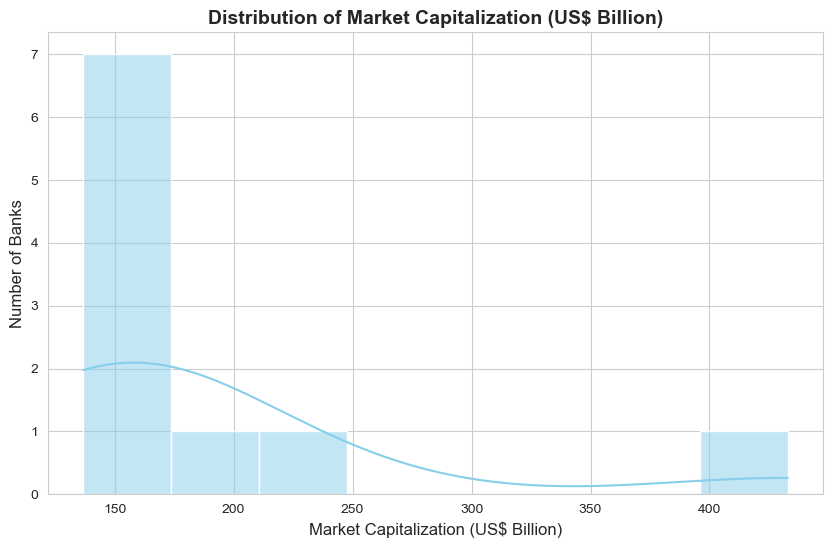

In [71]:
# Distribution of Market Cap (US$ Billion)

# Set the style for seaborn
sns.set_style("whitegrid")

# Plot the distribution of market cap
plt.figure(figsize=(10, 6))
sns.histplot(
    pandas_df["Market cap"],
    bins=8,
    kde=True,
    color="skyblue"
)
plt.title("Distribution of Market Capitalization (US$ Billion)", fontsize=14, fontweight="bold")
plt.xlabel("Market Capitalization (US$ Billion)", fontsize=12)
plt.ylabel("Number of Banks", fontsize=12)
plt.savefig("market_cap_distribution.png", dpi=300, bbox_inches="tight")

##**3.3. Top 10 Banks** <font color = red>[5 Marks]</font> <br>

Identify the top 10 banks by market capitalization using a bar chart

/var/folders/4q/jjl0wdwj7vnfv3dg7mg90tlc0000gn/T/ipykernel_43902/1451916677.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


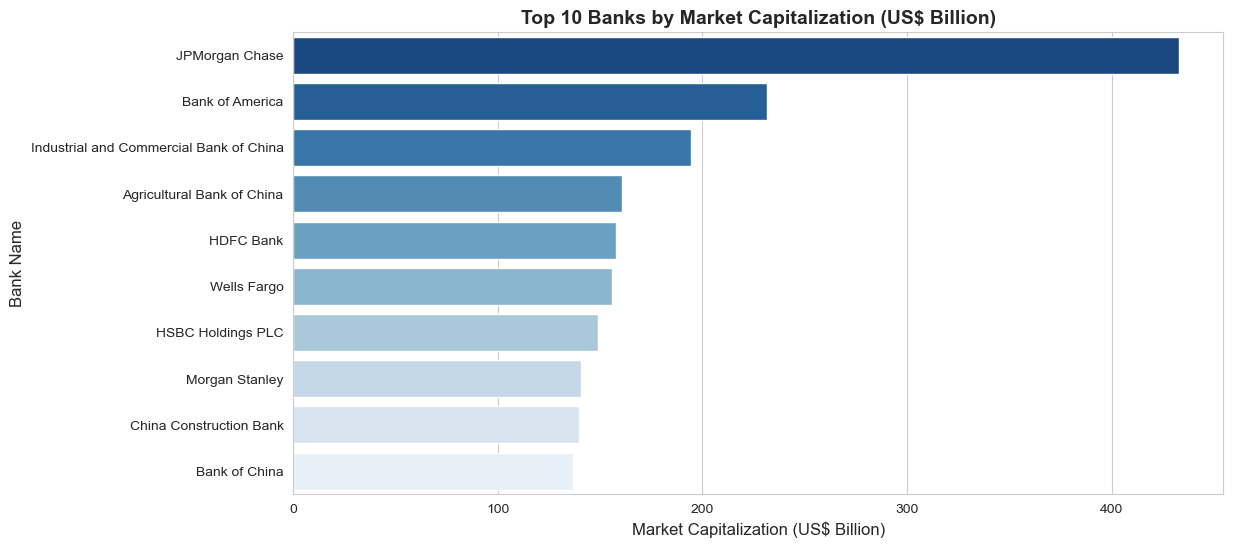

In [60]:
# Top 10 Banks by Market Cap

# Sort the DataFrame by market cap in descending order
top10_df = pandas_df.sort_values(by="Market cap", ascending=False).head(10)

# Plot the top 10 banks by market cap
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top10_df,
    x="Market cap",
    y="Bank_Name",
    palette="Blues_r"
)

plt.title("Top 10 Banks by Market Capitalization (US$ Billion)", fontsize=14, fontweight="bold")
plt.xlabel("Market Capitalization (US$ Billion)", fontsize=12)
plt.ylabel("Bank Name", fontsize=12)
plt.savefig("top_10_banks.png", dpi=300, bbox_inches="tight")

##**3.4. Market Cap vs Bank Ranking** <font color = red>[5 Marks]</font> <br>

Visualize the relationship between market capitalization and bank ranking using a scatter plot

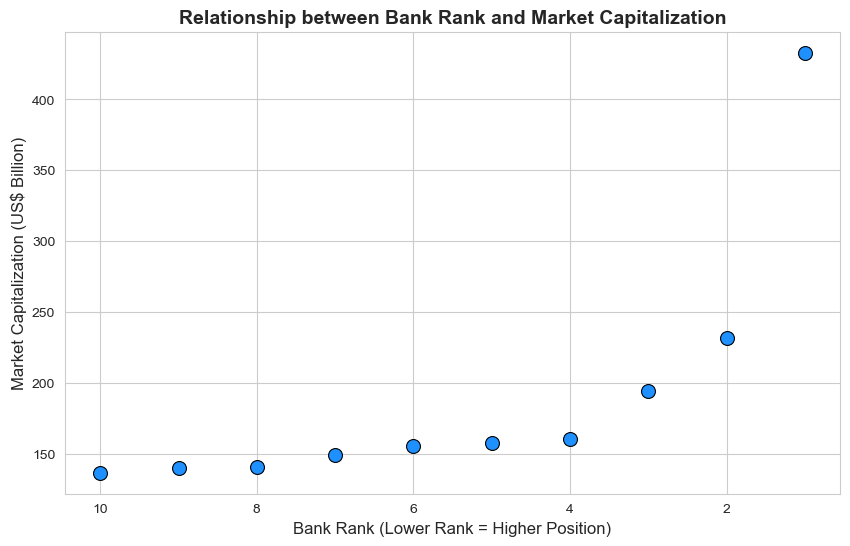

In [70]:
# Market Cap vs Rank

# Plot market cap vs rank

fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(
    data=pandas_df,
    x="Rank",
    y="Market cap",
    s=100,
    color="dodgerblue",
    edgecolor="black",
    ax=ax
)

ax.set_title("Relationship between Bank Rank and Market Capitalization", fontsize=14, fontweight="bold")
ax.set_xlabel("Bank Rank (Lower Rank = Higher Position)", fontsize=12)
ax.set_ylabel("Market Capitalization (US$ Billion)", fontsize=12)
ax.invert_xaxis()

fig.savefig("bank_rank_vs_market_cap_.png", dpi=300, bbox_inches="tight")


##**3.5. Market Cap Analysis** <font color = red>[5 Marks]</font> <br>

Use a boxplot to examine the spread and outliers in market capitalization.

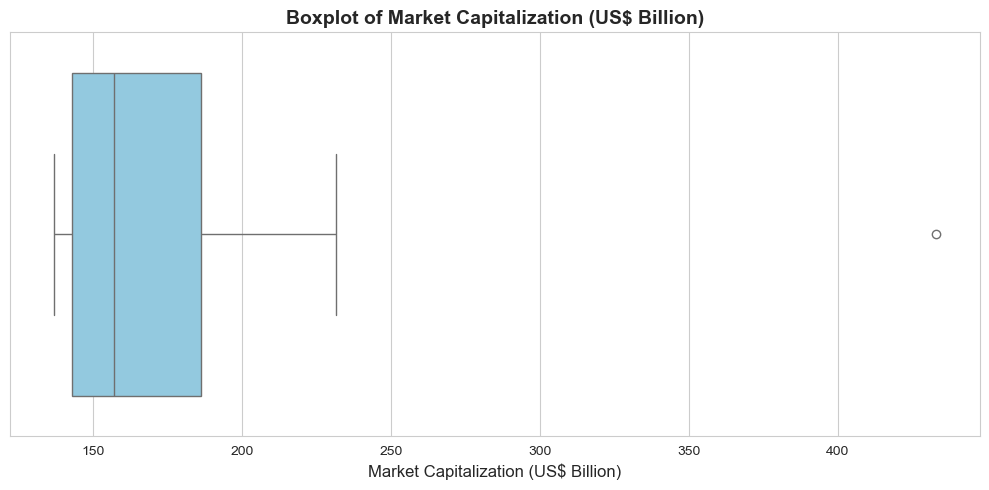

In [73]:
# Boxplot of Market Cap
#To show the spread and outliers in the market capitalization data.

# Plot a boxplot of market cap
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))
sns.boxplot(
    data=pandas_df,
    x="Market cap",
    color="skyblue"
)

plt.title("Boxplot of Market Capitalization (US$ Billion)", fontsize=14, fontweight="bold")
plt.xlabel("Market Capitalization (US$ Billion)", fontsize=12)

plt.savefig("market_cap_boxplot.png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()

##**3.6. Market Cap Quartile Distribution** <font color = red>[5 Marks]</font> <br>

Display the quartile distribution of market capitalization using a violin plot.

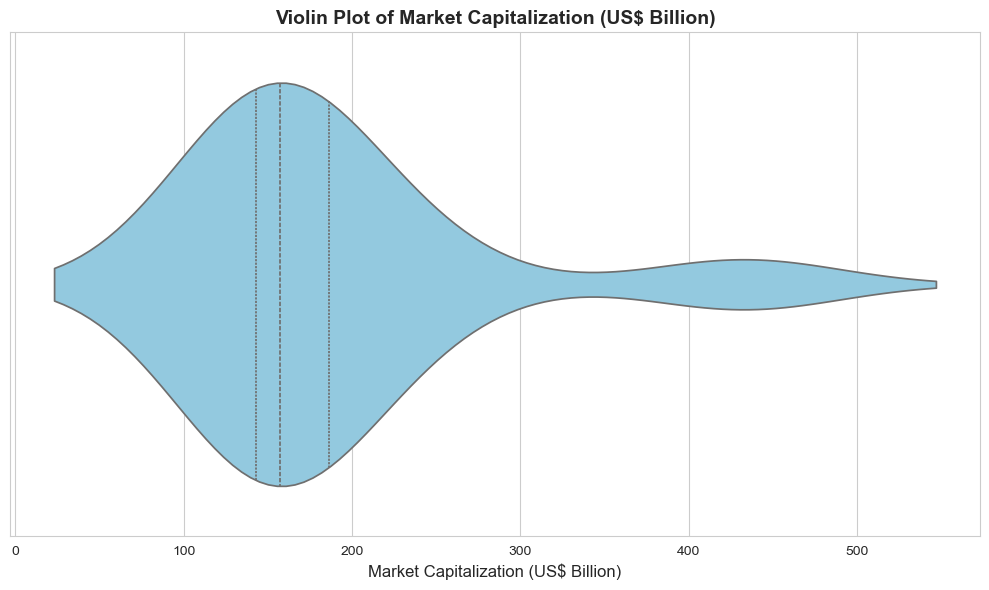

In [75]:
# Market Cap Distribution by Quartile
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.violinplot(
    data=pandas_df,
    x="Market cap",
    inner="quartile",
    color="skyblue"
)

plt.title("Violin Plot of Market Capitalization (US$ Billion)", fontsize=14, fontweight="bold")
plt.xlabel("Market Capitalization (US$ Billion)", fontsize=12)

plt.savefig("market_cap_violinplot.png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()


##**3.7. Cumulative Market Share Analysis** <font color = red>[5 Marks]</font> <br>

Compute cumulative market share and visualize it with a line plot.

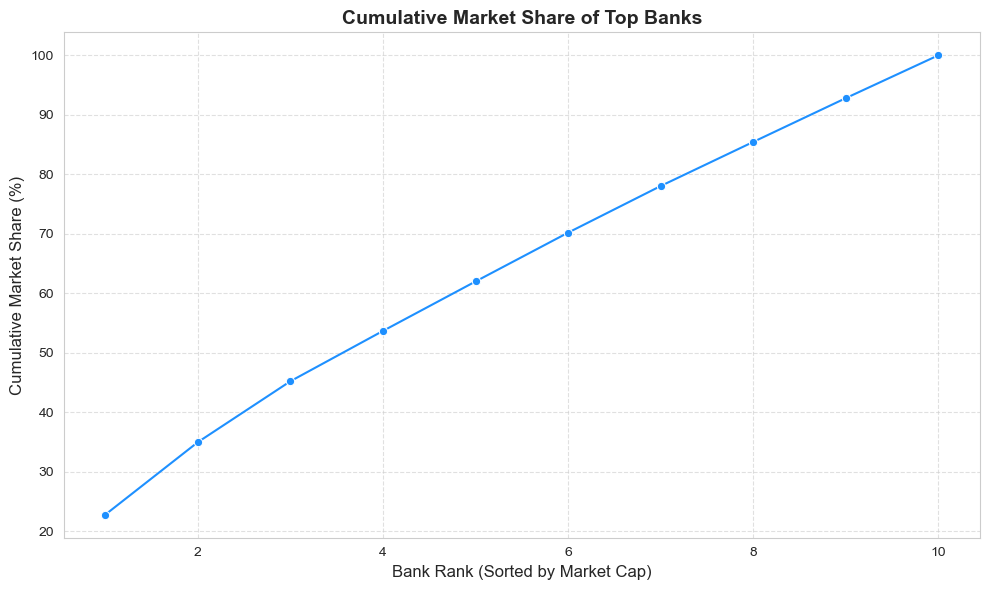

In [79]:
# Cumulative Market Share
total_market_cap = pandas_df["Market cap"].sum()
pandas_df["Cumulative_Share"] = pandas_df["Market cap"].cumsum() / total_market_cap * 100

# Plot
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=pandas_df,
    x=range(1, len(pandas_df) + 1),
    y="Cumulative_Share",
    marker="o",
    color="dodgerblue"
)

plt.title("Cumulative Market Share of Top Banks", fontsize=14, fontweight="bold")
plt.xlabel("Bank Rank (Sorted by Market Cap)", fontsize=12)
plt.ylabel("Cumulative Market Share (%)", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig("cumulative_market_share.png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()

##**3.8. Categorising Banks** <font color = red>[5 Marks]</font> <br>

Categorize banks into market capitalization ranges and analyze their distribution using a bar chart.

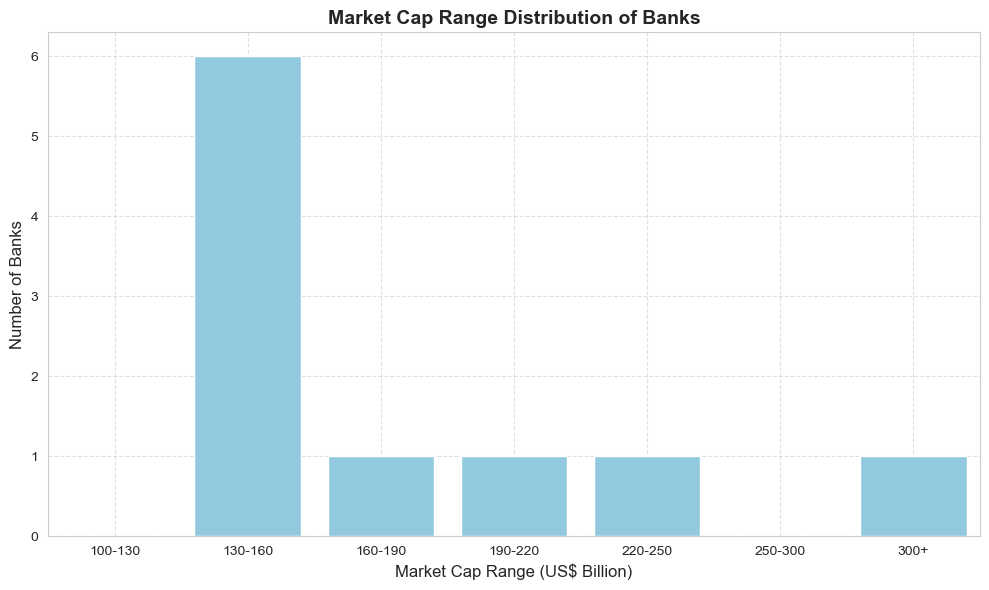

In [81]:
# Market Cap Range Distribution
bins = [100, 130, 160, 190, 220, 250, 300, 450]
labels = ["100-130", "130-160", "160-190", "190-220", "220-250", "250-300", "300+"]

pandas_df["Market_Cap_Range"] = pd.cut(pandas_df["Market cap"], bins=bins, labels=labels, include_lowest=True)

range_distribution = pandas_df["Market_Cap_Range"].value_counts().sort_index().reset_index()
range_distribution.columns = ["Market_Cap_Range", "Bank_Count"]

# Plot
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(
    data=range_distribution,
    x="Market_Cap_Range",
    y="Bank_Count",
    color="skyblue"
)

plt.title("Market Cap Range Distribution of Banks", fontsize=14, fontweight="bold")
plt.xlabel("Market Cap Range (US$ Billion)", fontsize=12)
plt.ylabel("Number of Banks", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig("market_cap_range_distribution.png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()

##**3.9. Visualise Market Share Distribution** <font color = red>[5 Marks]</font> <br>


Calculate and display market share distribution among the top 10 banks using a pie chart.

/var/folders/4q/jjl0wdwj7vnfv3dg7mg90tlc0000gn/T/ipykernel_43902/2212556149.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


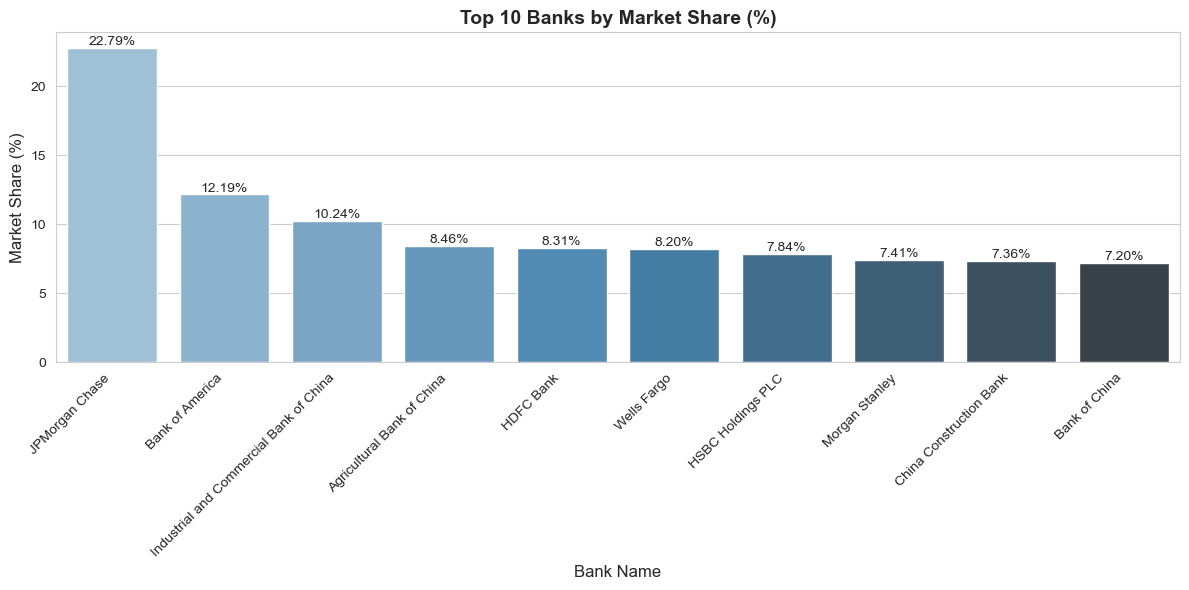

In [82]:
# Top 10 Banks Market Share
# Calculate market share percentage for top 10 banks
top10_df = pandas_df.sort_values(by="Market cap", ascending=False).head(10)

total_market_cap = top10_df["Market cap"].sum()
top10_df["Market_Share_%"] = (top10_df["Market cap"] / total_market_cap) * 100

# Plot
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top10_df,
    x="Bank_Name",
    y="Market_Share_%",
    palette="Blues_d"
)

plt.xticks(rotation=45, ha="right")

plt.title("Top 10 Banks by Market Share (%)", fontsize=14, fontweight="bold")
plt.xlabel("Bank Name", fontsize=12)
plt.ylabel("Market Share (%)", fontsize=12)

for index, value in enumerate(top10_df["Market_Share_%"]):
    plt.text(index, value + 0.2, f"{value:.2f}%", ha="center", fontsize=10)

plt.savefig("top10_banks_market_share.png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()

#**4. ETL and Querying** <font color = red>[45 marks]</font> <br>

In [83]:
#Imports & Spark Session Initialization

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lit, round
import logging
from datetime import datetime
import sqlite3
import pandas as pd

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("BankingDataAnalysis") \
    .getOrCreate()

# Logging Configuration
logfile = "code_log.txt"

In [87]:
#Logging Function

def log_progress(msg):
    timeformat = '%Y-%h-%d-%H:%M:%S'
    timestamp = datetime.now().strftime(timeformat)
    with open(logfile, 'a') as f:
        f.write(f"{timestamp} : {msg}\n")

In [85]:
# Import required functions
from pyspark.sql.functions import col, avg, sum, count, desc, asc, round, lag, dense_rank, ntile, when, first, lead
from pyspark.sql.window import Window
from pyspark.sql import functions as F

# First, let's rename your columns to match our queries (if needed)

# Create window specifications
window_spec = Window.orderBy(F.col("Market cap").desc())
window_spec

##**4.1. Market Capitalization Analysis** <font color = red>[3 marks]</font> <br>

Q: Perform Advanced Market Capitalization Analysis with Growth Metrics

In [90]:
# Query: Advanced Market Cap Analysis with Growth Metrics

log_progress("Starting Market Capitalization Analysis with Growth Metrics...")

spark_df = spark_df.withColumn("Prev_MarketCap", F.lag("Market cap").over(window_spec))
spark_df = spark_df.withColumn("Rank_by_MarketCap", F.row_number().over(window_spec))

spark_df = spark_df.withColumn(
    "MarketCap_Difference",
    F.col("Market cap") - F.col("Prev_MarketCap")
)

spark_df = spark_df.withColumn(
    "MarketCap_Growth_Percent",
    F.round((F.col("MarketCap_Difference") / F.col("Prev_MarketCap")) * 100, 2)
)

spark_df = spark_df.fillna({"Prev_MarketCap": 0, "MarketCap_Difference": 0, "MarketCap_Growth_Percent": 0})

log_progress("Growth metrics calculated (MarketCap difference and growth %)")

spark_df = spark_df.orderBy(F.col("Rank_by_MarketCap").asc())

spark_df.select(
    "Rank_by_MarketCap",
    "Bank_Name",
    "Market cap",
    "Prev_MarketCap",
    "MarketCap_Difference",
    "MarketCap_Growth_Percent"
).show(truncate=False)



25/11/04 15:42:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 15:42:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 15:42:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 15:42:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 15:42:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 15:42:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 1

+-----------------+---------------------------------------+----------+--------------+--------------------+------------------------+
|Rank_by_MarketCap|Bank_Name                              |Market cap|Prev_MarketCap|MarketCap_Difference|MarketCap_Growth_Percent|
+-----------------+---------------------------------------+----------+--------------+--------------------+------------------------+
|1                |JPMorgan Chase                         |432.92    |0.0           |0.0                 |0.0                     |
|2                |Bank of America                        |231.52    |432.92        |-201.4              |-46.52                  |
|3                |Industrial and Commercial Bank of China|194.56    |231.52        |-36.96000000000001  |-15.96                  |
|4                |Agricultural Bank of China             |160.68    |194.56        |-33.879999999999995 |-17.41                  |
|5                |HDFC Bank                              |157.91    |160.68

##4.2.**Market Concentration Analysis** <font color = red>[6 marks]</font> <br>

Q: Analyze Market Concentration and Categorize Banks Based on Market Share Tiers

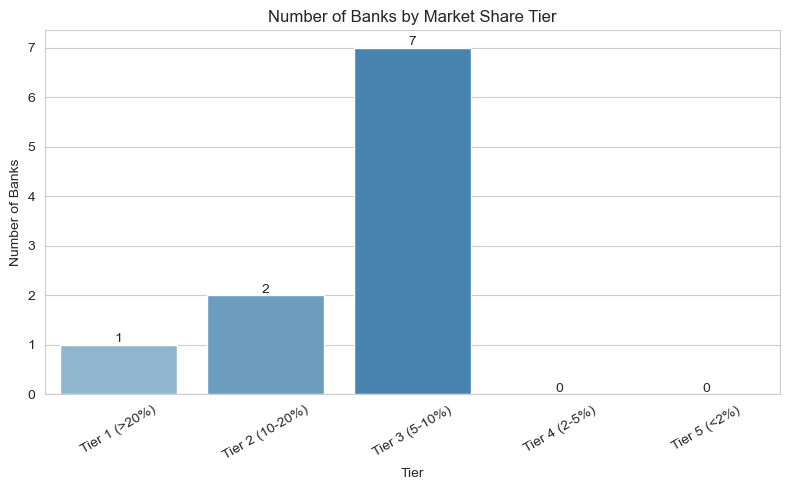

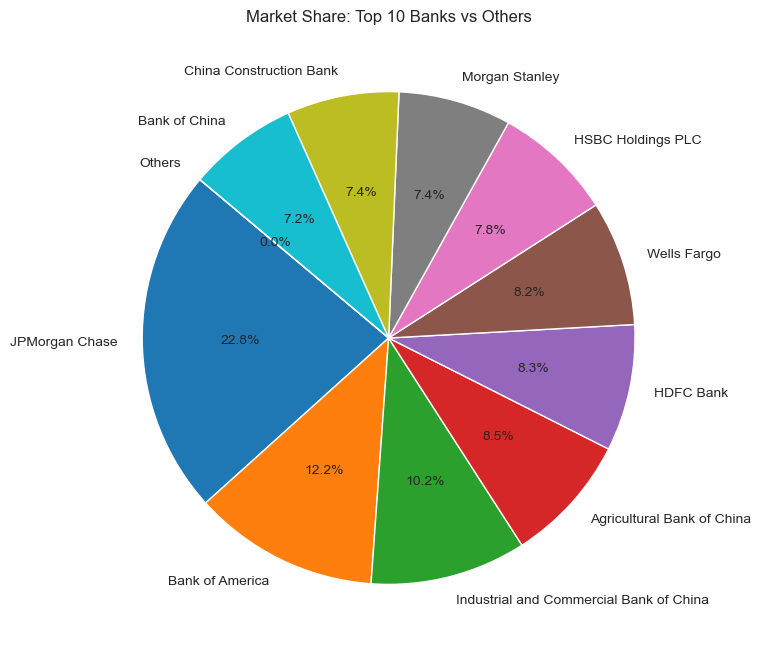

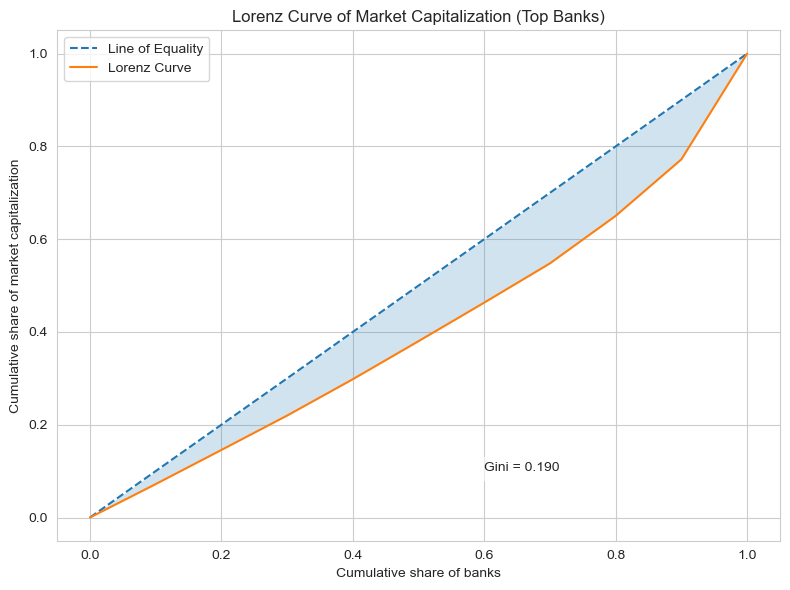

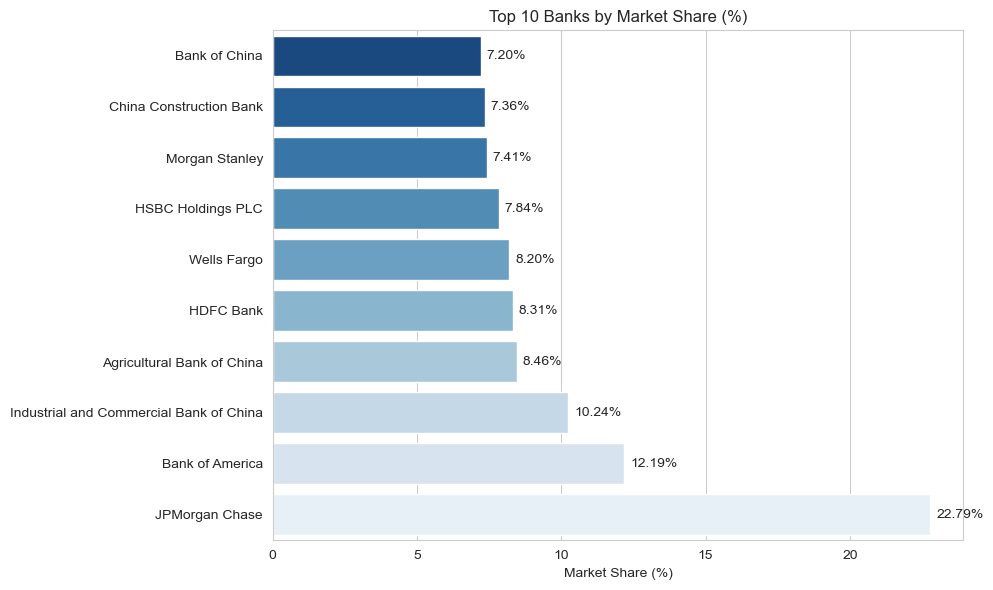

=== Key Metrics ===
Total Market Cap (top dataset): 1899.82 B USD
HHI (decimal form): 0.1203
HHI (percent-form, typical scale 0-10000): 1203.0
Gini coefficient: 0.1902

Tier counts:
Market_Share_Tier
Tier 1 (>20%)      1
Tier 2 (10-20%)    2
Tier 3 (5-10%)     7
Tier 4 (2-5%)      0
Tier 5 (<2%)       0
Name: count, dtype: int64

Top 10 market share (percent):
                              Bank_Name  Market_Share_pct
                         JPMorgan Chase         22.787422
                        Bank of America         12.186418
Industrial and Commercial Bank of China         10.240970
             Agricultural Bank of China          8.457643
                              HDFC Bank          8.311840
                            Wells Fargo          8.204461
                      HSBC Holdings PLC          7.837585
                         Morgan Stanley          7.412808
                China Construction Bank          7.359645
                          Bank of China          7.201209

In [100]:
# Market Concentration Analysis

log_progress("Starting Market Concentration Analysis...")

total_market_cap_all = pandas_df["Market cap"].sum()
pandas_df["Market_Share_pct"] = (pandas_df["Market cap"] / total_market_cap_all) * 100
pandas_df["Market_Share_dec"] = pandas_df["Market cap"] / total_market_cap_all  # decimal [0,1]

log_progress(f"Computed market shares. Total Market Cap = {total_market_cap_all:.2f} B USD")

def assign_tier(pct):
    if pct > 20:
        return "Tier 1 (>20%)"
    elif pct > 10:
        return "Tier 2 (10-20%)"
    elif pct > 5:
        return "Tier 3 (5-10%)"
    elif pct > 2:
        return "Tier 4 (2-5%)"
    else:
        return "Tier 5 (<2%)"

pandas_df["Market_Share_Tier"] = pandas_df["Market_Share_pct"].apply(assign_tier)

tier_counts = pandas_df["Market_Share_Tier"].value_counts().reindex(
    ["Tier 1 (>20%)", "Tier 2 (10-20%)", "Tier 3 (5-10%)", "Tier 4 (2-5%)", "Tier 5 (<2%)"]
).fillna(0).astype(int)

# Calculate HHI (Herfindahl–Hirschman Index)
hhi_decimal = (pandas_df["Market_Share_dec"] ** 2).sum()
hhi_percent_form = (pandas_df["Market_Share_pct"] ** 2).sum()

# Lorenz Curve & Gini Coefficient
sorted_shares = np.sort(pandas_df["Market_Share_dec"].values)
cum_shares = np.cumsum(sorted_shares)
cum_shares = np.insert(cum_shares, 0, 0)  # start at 0
population_frac = np.linspace(0, 1, len(cum_shares))  # population fraction

area_under_lorenz = np.trapezoid(cum_shares, population_frac)
gini = 1 - 2 * area_under_lorenz
log_progress(f"Computed Lorenz and Gini. Gini coefficient = {gini:.4f}")

sns.set_style("whitegrid")

plt.figure(figsize=(8,5))
ax = sns.barplot(x=tier_counts.index, y=tier_counts.values, hue=tier_counts.index, palette="Blues_d", legend=False)

plt.title("Number of Banks by Market Share Tier")
plt.xlabel("Tier")
plt.ylabel("Number of Banks")
plt.xticks(rotation=30)
for i, v in enumerate(tier_counts.values):
    plt.text(i, v + 0.05, str(v), ha='center')
plt.tight_layout()
plt.show()
plt.savefig("market_share_tier_distribution.png", dpi=300, bbox_inches="tight")
plt.close()

top_n = 10
top10 = pandas_df.sort_values("Market cap", ascending=False).head(top_n).copy()

others_share = 100 - top10["Market_Share_pct"].sum()
import builtins
others_share = max(0, builtins.round(float(others_share), 2))

if (top10["Market_Share_pct"].sum() + others_share) > 100:
    others_share = 100 - top10["Market_Share_pct"].sum()

pie_labels = top10["Bank_Name"].tolist() + ["Others"]
pie_sizes = top10["Market_Share_pct"].tolist() + [others_share]
pie_sizes = [max(0, v) for v in pie_sizes]  # ensure non-negative

plt.figure(figsize=(10,8))
plt.pie(pie_sizes, labels=pie_labels, autopct='%1.1f%%', startangle=140)
plt.title(f"Market Share: Top {top_n} Banks vs Others")
plt.show()
plt.savefig("top10_vs_others_pie.png", dpi=300, bbox_inches="tight")
plt.close()

plt.figure(figsize=(8,6))
plt.plot(population_frac, population_frac, '--', label='Line of Equality')
plt.plot(population_frac, np.concatenate([cum_shares[0:1], cum_shares[1:]]), label='Lorenz Curve')
plt.fill_between(population_frac, np.concatenate([cum_shares[0:1], cum_shares[1:]]), population_frac, alpha=0.2)
plt.title("Lorenz Curve of Market Capitalization (Top Banks)")
plt.xlabel("Cumulative share of banks")
plt.ylabel("Cumulative share of market capitalization")
plt.legend()
plt.text(0.6, 0.1, f"Gini = {gini:.3f}", bbox=dict(facecolor='white', alpha=0.6))
plt.tight_layout()
plt.show()
plt.savefig("market_cap_lorenz_curve.png", dpi=300, bbox_inches="tight")
plt.close()

plt.figure(figsize=(10,6))
top10_sorted = top10.sort_values("Market_Share_pct", ascending=True)
ax = sns.barplot(x="Market_Share_pct", y="Bank_Name", hue="Bank_Name", data=top10_sorted, palette="Blues_r", legend=False)

plt.xlabel("Market Share (%)")
plt.ylabel("")
plt.title("Top 10 Banks by Market Share (%)")
for i, (pct) in enumerate(top10_sorted["Market_Share_pct"]):
    plt.text(pct + 0.2, i, f"{pct:.2f}%", va='center')
plt.tight_layout()
plt.show()
plt.savefig("top10_market_share_horizontal.png", dpi=300, bbox_inches="tight")
plt.close()

log_progress("Market Concentration Analysis completed.")

print("=== Key Metrics ===")
print(f"Total Market Cap (top dataset): {total_market_cap_all:.2f} B USD")
print(f"HHI (decimal form): {hhi_decimal:.4f}")
print(f"HHI (percent-form, typical scale 0-10000): {hhi_percent_form:.1f}")
print(f"Gini coefficient: {gini:.4f}")
print("\nTier counts:")
print(tier_counts)
print("\nTop 10 market share (percent):")
print(top10[["Bank_Name", "Market_Share_pct"]].to_string(index=False))


##**4.3. Market Capitalization Distribution** <font color = red>[6 marks]</font> <br>

Q: Examine Statistical Distribution of Market Capitalization Using Quartile Analysis

25/11/04 16:13:56 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 16:13:56 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 16:13:56 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 16:13:56 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 16:13:56 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 16:13:56 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 1

+--------+----------+-----------------+-------------+-------------+---------------+
|Quartile|Bank_Count|Average_MarketCap|Min_MarketCap|Max_MarketCap|Total_MarketCap|
+--------+----------+-----------------+-------------+-------------+---------------+
|1       |3         |286.33           |194.56       |432.92       |859.0          |
|2       |3         |158.15           |155.87       |160.68       |474.46         |
|3       |2         |144.87           |140.83       |148.9        |289.73         |
|4       |2         |138.32           |136.81       |139.82       |276.63         |
+--------+----------+-----------------+-------------+-------------+---------------+



25/11/04 16:13:57 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 16:13:57 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 16:13:57 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 16:13:57 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 16:13:57 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 16:13:57 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


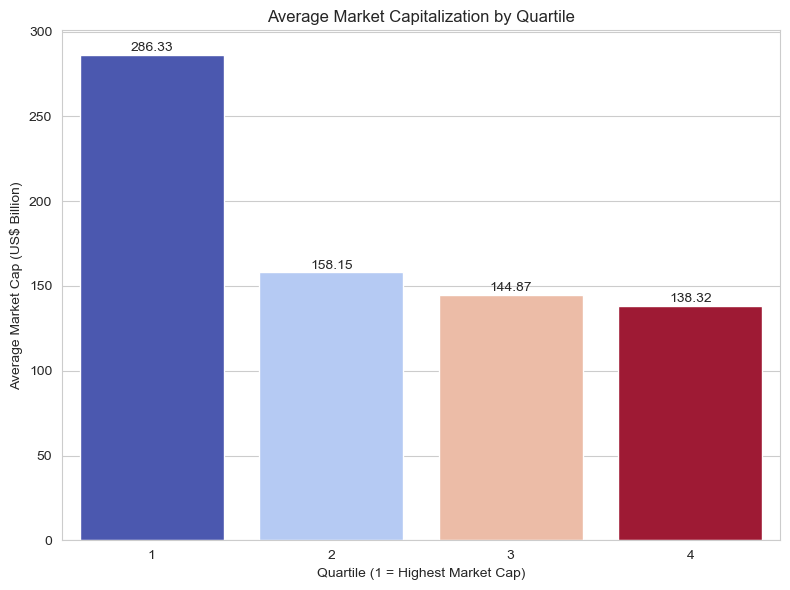

In [109]:
# Import required functions
from pyspark.sql.functions import (col, avg, sum, count, desc, asc, round, lag,
                                 dense_rank, ntile, when, first, lead, min, max, lit)
from pyspark.sql.window import Window

# Query 3: Statistical Distribution Analysis
window_spec = Window.orderBy(F.col("Market cap").desc())

spark_df_quartiles = spark_df.withColumn("Quartile", ntile(4).over(window_spec))

quartile_stats = (
    spark_df_quartiles.groupBy("Quartile")
    .agg(
        count("*").alias("Bank_Count"),
        round(avg("Market cap"), 2).alias("Average_MarketCap"),
        round(min("Market cap"), 2).alias("Min_MarketCap"),
        round(max("Market cap"), 2).alias("Max_MarketCap"),
        round(sum("Market cap"), 2).alias("Total_MarketCap")
    )
    .orderBy("Quartile")
)

quartile_stats.show(truncate=False)
log_progress("Computed quartile statistics for market capitalization.")

quartile_pd = quartile_stats.toPandas()

plt.figure(figsize=(8, 6))
sns.barplot(x="Quartile", y="Average_MarketCap", data=quartile_pd, palette="coolwarm", hue="Quartile", legend=False)
plt.title("Average Market Capitalization by Quartile")
plt.xlabel("Quartile (1 = Highest Market Cap)")
plt.ylabel("Average Market Cap (US$ Billion)")
for i, v in enumerate(quartile_pd["Average_MarketCap"]):
    plt.text(i, v + 2, f"{v:.2f}", ha='center', fontsize=10)
plt.tight_layout()
plt.show()
plt.savefig("quartile_avg_market_cap.png", dpi=300, bbox_inches="tight")
plt.close()

##**4.4. Comparative Size Analysis** <font color = red>[6 marks]</font> <br>

Q: Conduct Comparative Size Analysis to Classify Banks by Relative Market Size

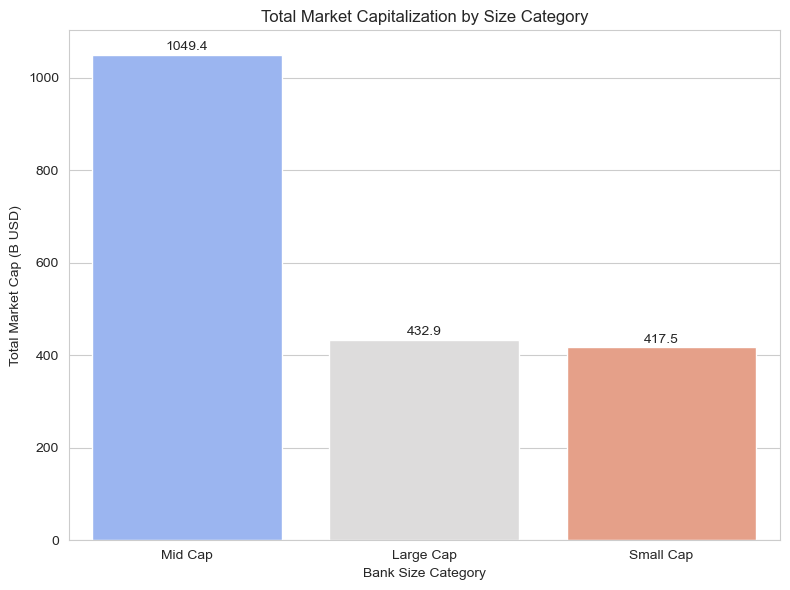



=== Comparative Size Analysis Report ===
Size_Category  Bank_Count  Avg_MarketCap  Total_MarketCap
      Mid Cap           6     174.906667          1049.44
    Large Cap           1     432.920000           432.92
    Small Cap           3     139.153333           417.46


In [113]:
# Comparative Size Analysis

total_market_cap = pandas_df["Market cap"].sum()
avg_market_cap = pandas_df["Market cap"].mean()

def classify_size(cap, avg):
    if cap > avg * 1.5:
        return "Large Cap"
    elif cap > avg * 0.75:
        return "Mid Cap"
    else:
        return "Small Cap"

pandas_df["Size_Category"] = pandas_df["Market cap"].apply(lambda x: classify_size(x, avg_market_cap))

category_stats = (
    pandas_df.groupby("Size_Category")
    .agg(
        Bank_Count=("Bank_Name", "count"),
        Avg_MarketCap=("Market cap", "mean"),
        Total_MarketCap=("Market cap", "sum")
    )
    .sort_values("Total_MarketCap", ascending=False)
    .reset_index()
)

sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
ax = sns.barplot(
    x="Size_Category",
    y="Total_MarketCap",
    hue="Size_Category",
    data=category_stats,
    palette="coolwarm",
    legend=False
)
plt.title("Total Market Capitalization by Size Category")
plt.xlabel("Bank Size Category")
plt.ylabel("Total Market Cap (B USD)")

for i, v in enumerate(category_stats["Total_MarketCap"]):
    plt.text(i, v + 10, f"{v:.1f}", ha='center')

plt.tight_layout()
plt.show()
plt.savefig("comparative_size_analysis.png", dpi=300, bbox_inches="tight")
plt.close()

log_progress("Comparative Size Analysis completed.")

print("\n\n=== Comparative Size Analysis Report ===")
print(category_stats.to_string(index=False))


##**4.5. Market Growth Analysis** <font color = red>[6 marks]</font> <br>

Q: Evaluate Market Growth and Identify Gaps Between Consecutive Banks

25/11/04 16:30:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 16:30:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 16:30:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 16:30:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 16:30:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 16:30:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 1

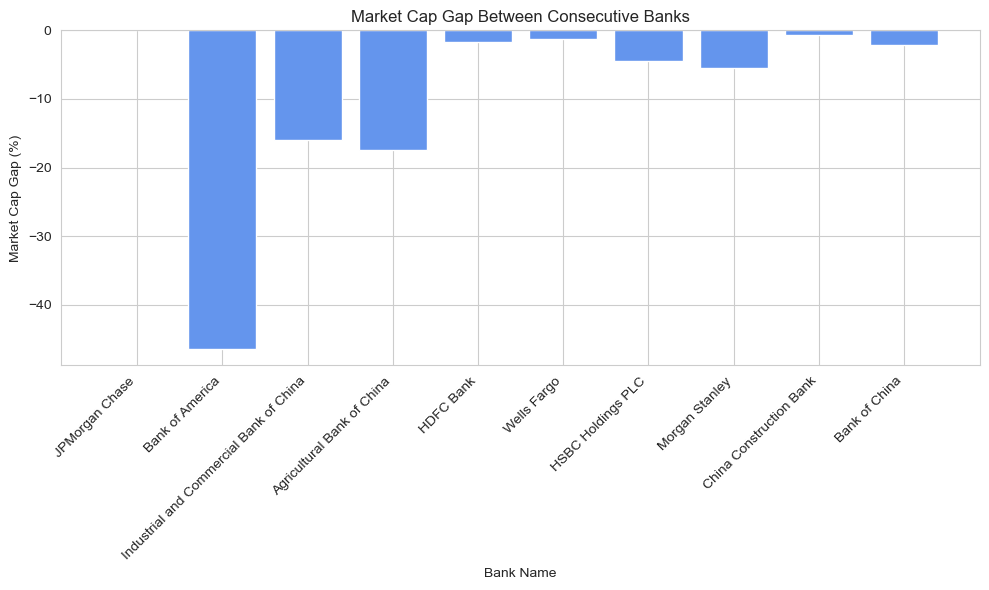

In [116]:
# Growth and Gap Analysis

window_spec = Window.orderBy(F.col("Market cap").desc())
spark_df = (
    spark_df
    .withColumn("Prev_MarketCap", F.lag("Market cap").over(window_spec))
    .withColumn("MarketCap_Diff", F.col("Market cap") - F.col("Prev_MarketCap"))
    .withColumn(
        "MarketCap_Gap_Percent",
        F.when(F.col("Prev_MarketCap").isNotNull(),
               (F.col("MarketCap_Diff") / F.col("Prev_MarketCap")) * 100)
        .otherwise(F.lit(0))
    )
    .withColumn("Rank_by_MarketCap", F.dense_rank().over(window_spec))
)

log_progress("Computed growth metrics and gaps between consecutive banks.")

growth_df = spark_df.orderBy("Rank_by_MarketCap").toPandas()

sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
plt.bar(growth_df["Bank_Name"], growth_df["MarketCap_Gap_Percent"], color="cornflowerblue")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Bank Name")
plt.ylabel("Market Cap Gap (%)")
plt.title("Market Cap Gap Between Consecutive Banks")
plt.tight_layout()
plt.show()
plt.savefig("market_cap_gap_analysis.png", dpi=300, bbox_inches="tight")
plt.close()

log_progress("Market Growth Analysis completed successfully.")


##**4.6. Market Dominance Analysis** <font color = red>[6 marks]</font> <br>

Q: Assess Market Dominance by Measuring Cumulative Share and Dominance Score

25/11/04 16:32:58 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 16:32:58 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 16:32:58 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 16:32:58 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 16:32:58 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 16:32:58 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 1

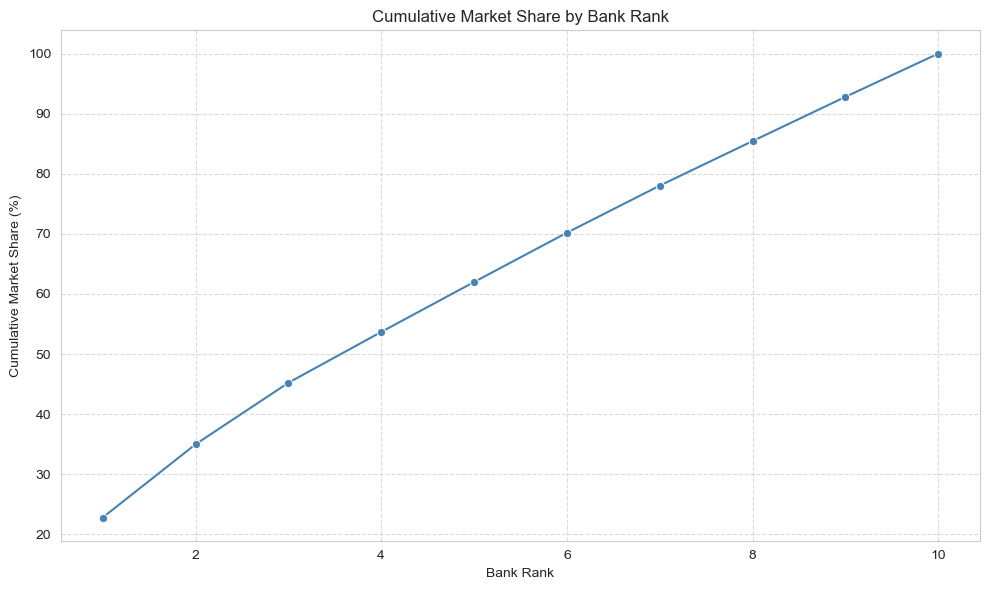

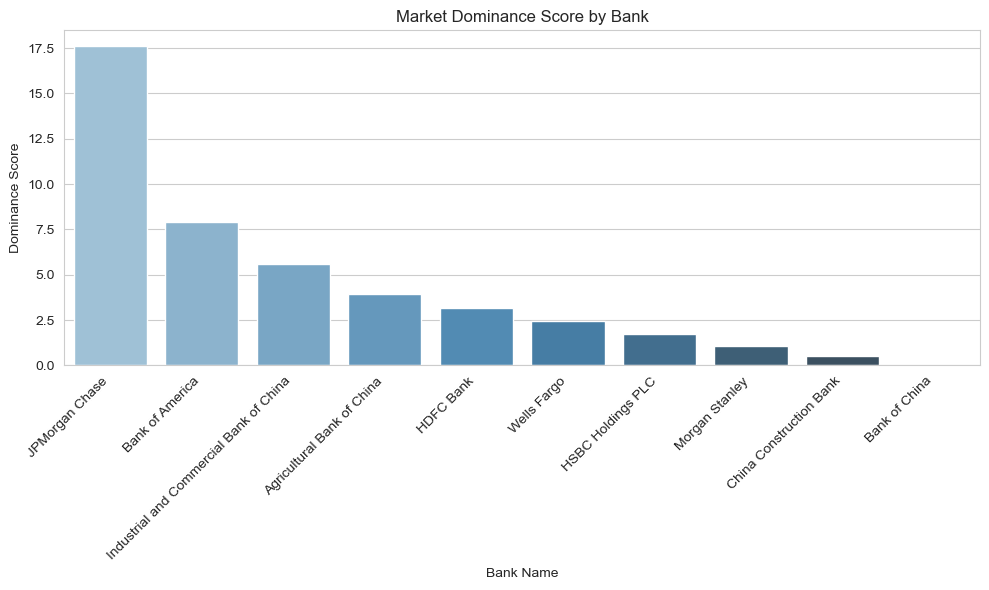

=== Market Dominance Summary ===
                                 Bank_Name  Market cap  Market_Share_pct  \
0                           JPMorgan Chase      432.92         22.787422   
1                          Bank of America      231.52         12.186418   
2  Industrial and Commercial Bank of China      194.56         10.240970   
3               Agricultural Bank of China      160.68          8.457643   
4                                HDFC Bank      157.91          8.311840   
5                              Wells Fargo      155.87          8.204461   
6                        HSBC Holdings PLC      148.90          7.837585   
7                           Morgan Stanley      140.83          7.412808   
8                  China Construction Bank      139.82          7.359645   
9                            Bank of China      136.81          7.201209   

   Cumulative_Share_pct  Dominance_Score  
0             22.787422     1.759476e+01  
1             34.973840     7.924359e+00  
2

In [117]:
# Market Dominance Analysis

pandas_df = spark_df.toPandas()

total_market_cap = pandas_df["Market cap"].sum()

pandas_df["Market_Share_pct"] = (pandas_df["Market cap"] / total_market_cap) * 100
pandas_df = pandas_df.sort_values("Market cap", ascending=False).reset_index(drop=True)
pandas_df["Cumulative_Share_pct"] = pandas_df["Market_Share_pct"].cumsum()

pandas_df["Dominance_Score"] = pandas_df["Market_Share_pct"] * (1 - (pandas_df["Cumulative_Share_pct"] / 100))

log_progress("Computed cumulative and dominance metrics.")

# pandas_df.to_csv("market_dominance_metrics.csv", index=False)

plt.figure(figsize=(10,6))
sns.lineplot(x=pandas_df.index + 1, y=pandas_df["Cumulative_Share_pct"], marker="o", color="steelblue")
plt.title("Cumulative Market Share by Bank Rank")
plt.xlabel("Bank Rank")
plt.ylabel("Cumulative Market Share (%)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
plt.savefig("cumulative_market_share_lineplot.png", dpi=300, bbox_inches="tight")
plt.close()

plt.figure(figsize=(10,6))
sns.barplot(x=pandas_df["Bank_Name"], y=pandas_df["Dominance_Score"], palette="Blues_d", hue=pandas_df["Bank_Name"], legend=False)
plt.xticks(rotation=45, ha="right")
plt.title("Market Dominance Score by Bank")
plt.xlabel("Bank Name")
plt.ylabel("Dominance Score")
plt.tight_layout()
plt.show()
plt.savefig("market_dominance_score_barplot.png", dpi=300, bbox_inches="tight")
plt.close()

log_progress("Market Dominance Analysis completed successfully.")

print("=== Market Dominance Summary ===")
print(pandas_df[["Bank_Name", "Market cap", "Market_Share_pct", "Cumulative_Share_pct", "Dominance_Score"]])


##**4.7. Segment-Wise Bank Analysis** <font color = red>[6 marks]</font> <br>

Q: Analyze Segment-Wise Bank Performance Based on Market Capitalization Ranges

25/11/04 16:38:21 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 16:38:21 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 16:38:21 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 16:38:21 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 16:38:22 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 16:38:22 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 1

+--------------------+----------+-------------+---------------+-------------+-------------+
|     MarketCap_Range|Bank_Count|Avg_MarketCap|Total_MarketCap|Min_MarketCap|Max_MarketCap|
+--------------------+----------+-------------+---------------+-------------+-------------+
|    Mega Cap (≥400B)|         1|       432.92|         432.92|       432.92|       432.92|
|Large Cap (200-400B)|         1|       231.52|         231.52|       231.52|       231.52|
|Upper Mid Cap (15...|         4|       167.26|         669.02|       155.87|       194.56|
|Lower Mid Cap (13...|         4|       141.59|         566.36|       136.81|        148.9|
+--------------------+----------+-------------+---------------+-------------+-------------+



25/11/04 16:38:22 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 16:38:22 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 16:38:22 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 16:38:22 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 16:38:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 16:38:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/04 1

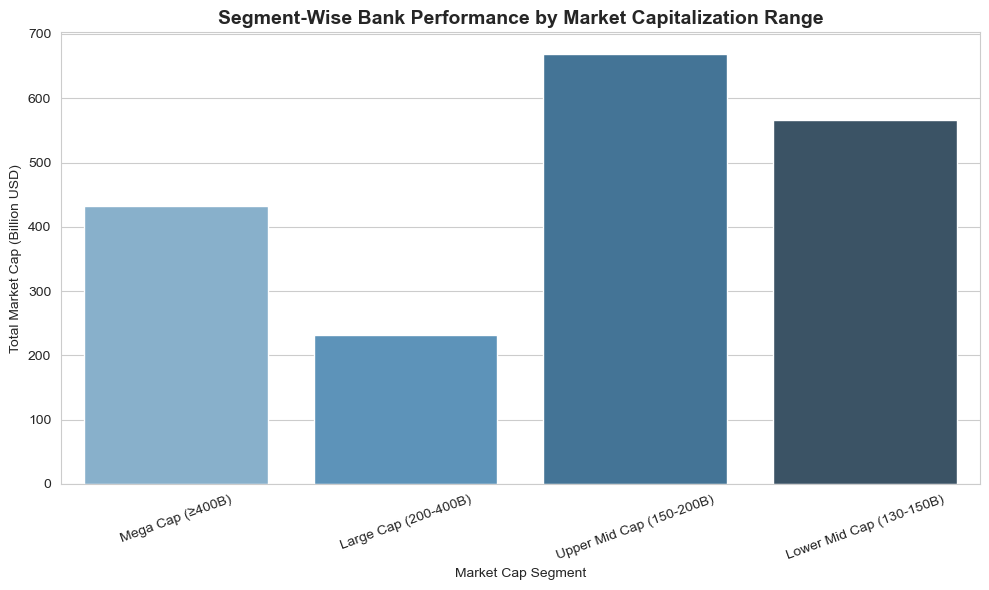

In [120]:
# Segment Performance Analysis

df_segmented = spark_df.withColumn(
    "MarketCap_Range",
    F.when(F.col("Market cap") >= 400, "Mega Cap (≥400B)")
     .when((F.col("Market cap") >= 200) & (F.col("Market cap") < 400), "Large Cap (200-400B)")
     .when((F.col("Market cap") >= 150) & (F.col("Market cap") < 200), "Upper Mid Cap (150-200B)")
     .when((F.col("Market cap") >= 130) & (F.col("Market cap") < 150), "Lower Mid Cap (130-150B)")
     .otherwise("Small Cap (<130B)")
)

segment_stats = (
    df_segmented.groupBy("MarketCap_Range")
    .agg(
        F.count("*").alias("Bank_Count"),
        F.round(F.avg("Market cap"), 2).alias("Avg_MarketCap"),
        F.round(F.sum("Market cap"), 2).alias("Total_MarketCap"),
        F.round(F.min("Market cap"), 2).alias("Min_MarketCap"),
        F.round(F.max("Market cap"), 2).alias("Max_MarketCap")
    )
    .orderBy(F.desc("Avg_MarketCap"))
)

segment_stats.show()

segment_pd = segment_stats.toPandas()

plt.figure(figsize=(10,6))
sns.barplot(x="MarketCap_Range", y="Total_MarketCap", data=segment_pd, palette="Blues_d")
plt.title("Segment-Wise Bank Performance by Market Capitalization Range", fontsize=14, weight="bold")
plt.ylabel("Total Market Cap (Billion USD)")
plt.xlabel("Market Cap Segment")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


##**4.8. Performance Dashboard** <font color = red>[6 marks]</font> <br>

Q: Generate a Comprehensive Performance Dashboard for Bank Rankings and Metrics

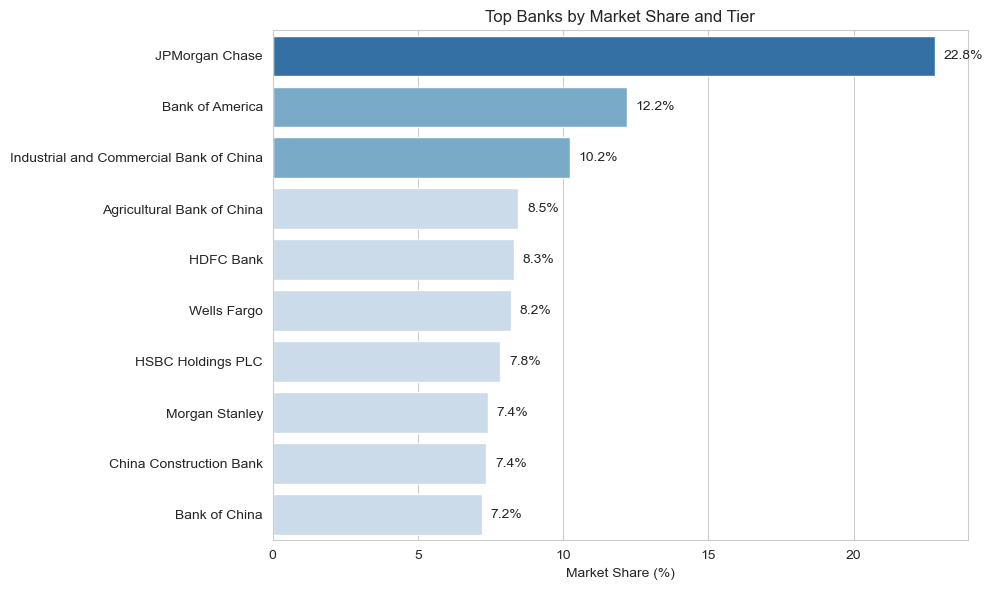

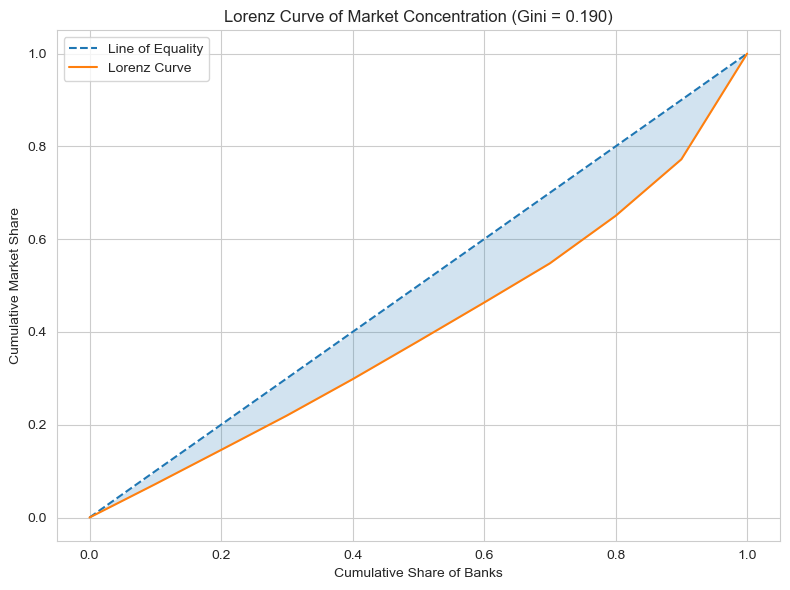

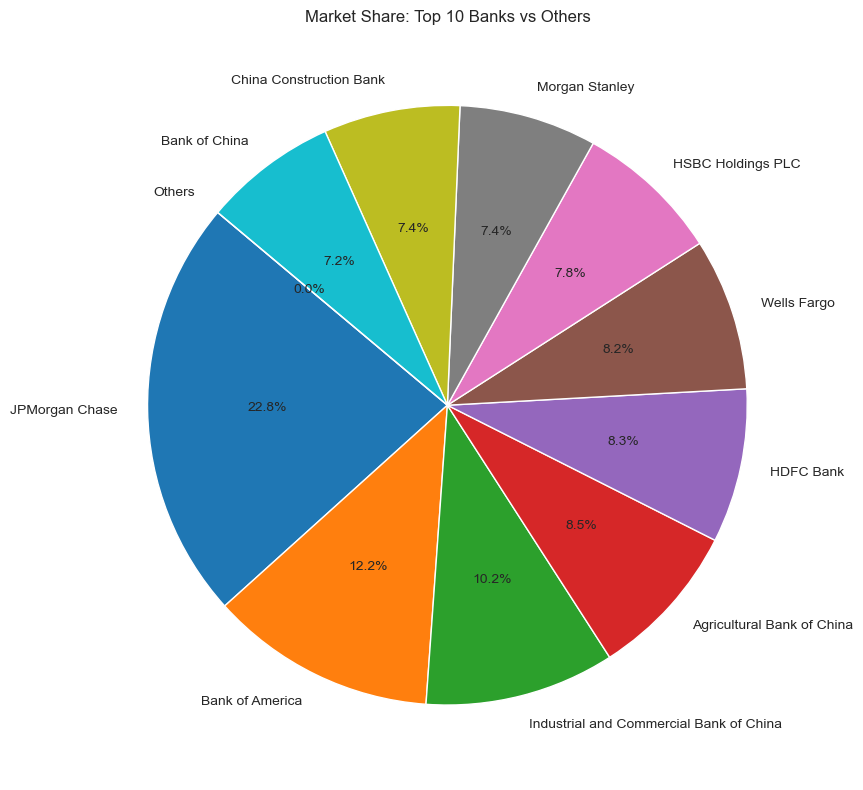

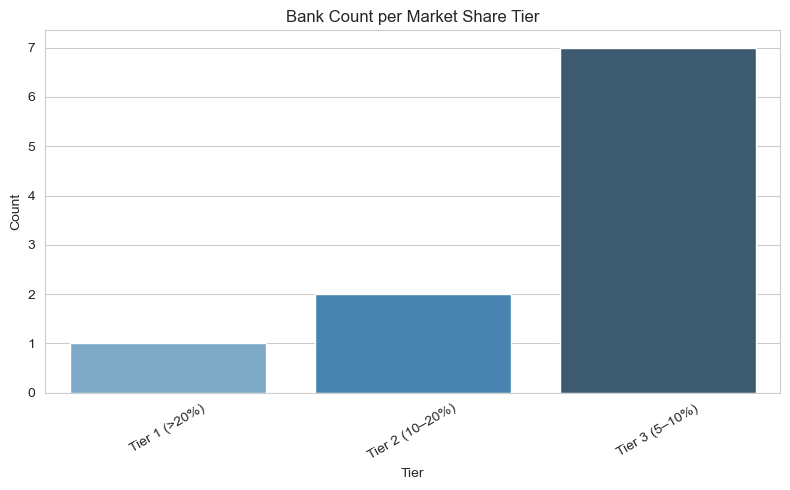

✅ Dashboard charts saved successfully!
                     mean      sum     min     max
Market cap        189.982  1899.82  136.81  432.92
Market_Share_pct   10.000   100.00     NaN     NaN


In [127]:
# Comprehensive Performance Dashboard

sns.set_style("whitegrid")

pandas_df["Rank_by_MarketCap"] = pandas_df["Market cap"].rank(ascending=False, method="dense").astype(int)

def assign_tier(pct):
    if pct > 20:
        return "Tier 1 (>20%)"
    elif pct > 10:
        return "Tier 2 (10–20%)"
    elif pct > 5:
        return "Tier 3 (5–10%)"
    elif pct > 2:
        return "Tier 4 (2–5%)"
    else:
        return "Tier 5 (<2%)"

pandas_df["Tier"] = pandas_df["Market_Share_pct"].apply(assign_tier)

summary_stats = pandas_df.agg({
    "Market cap": ["mean", "sum", "min", "max"],
    "Market_Share_pct": ["mean", "sum"]
}).T

plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=pandas_df.sort_values("Market_Share_pct", ascending=False),
    x="Market_Share_pct", y="Bank_Name", hue="Tier", legend=False, palette="Blues_r"
)
plt.title("Top Banks by Market Share and Tier")
plt.xlabel("Market Share (%)")
plt.ylabel("")
for i, v in enumerate(pandas_df.sort_values("Market_Share_pct", ascending=False)["Market_Share_pct"]):
    plt.text(v + 0.3, i, f"{v:.1f}%", va='center')
plt.tight_layout()
plt.savefig("dashboard_market_share_bars.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

sorted_shares = np.sort(pandas_df["Market_Share_pct"].values / 100)
cum_shares = np.cumsum(sorted_shares)
cum_shares = np.insert(cum_shares, 0, 0)
population_frac = np.linspace(0, 1, len(cum_shares))
area_under_lorenz = np.trapezoid(cum_shares, population_frac)
gini = 1 - 2 * area_under_lorenz

plt.figure(figsize=(8,6))
plt.plot(population_frac, population_frac, '--', label='Line of Equality')
plt.plot(population_frac, cum_shares, label='Lorenz Curve')
plt.fill_between(population_frac, cum_shares, population_frac, alpha=0.2)
plt.title(f"Lorenz Curve of Market Concentration (Gini = {gini:.3f})")
plt.xlabel("Cumulative Share of Banks")
plt.ylabel("Cumulative Market Share")
plt.legend()
plt.tight_layout()
plt.savefig("dashboard_lorenz_curve.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

top10 = pandas_df.sort_values("Market cap", ascending=False).head(10).copy()
import builtins
others_share = builtins.max(0, builtins.round(others_share, 2))
# others_share = max(0, round(100 - top10["Market_Share_pct"].sum(), 2))
pie_labels = top10["Bank_Name"].tolist() + ["Others"]
pie_sizes = top10["Market_Share_pct"].tolist() + [others_share]

plt.figure(figsize=(9,8))
plt.pie(pie_sizes, labels=pie_labels, autopct='%1.1f%%', startangle=140)
plt.title("Market Share: Top 10 Banks vs Others")
plt.tight_layout()
plt.savefig("dashboard_top10_vs_others.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

tier_summary = pandas_df.groupby("Tier").agg({
    "Bank_Name": "count",
    "Market cap": "sum",
    "Market_Share_pct": "mean"
}).rename(columns={"Bank_Name": "Bank_Count"}).reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=tier_summary, x="Tier", y="Bank_Count", hue="Tier", palette="Blues_d", legend=False)
plt.xticks(rotation=30)
plt.title("Bank Count per Market Share Tier")
plt.ylabel("Count")
plt.xlabel("Tier")
plt.tight_layout()
plt.savefig("dashboard_tier_distribution.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

log_progress("Dashboard generation completed successfully.")
print("✅ Dashboard charts saved successfully!")
print(summary_stats)



#5. Visualization Integration

In [ ]:
# Visualization Setup Section

# 1. Prepare data for visualization platforms
# 2. Generate Tableau connection instructions

# 3. Generate Power BI connection instructions

# 4. Execute visualization setup
# 5. Sample Dashboard Layout (Documentation)
